In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


150.3582738095238


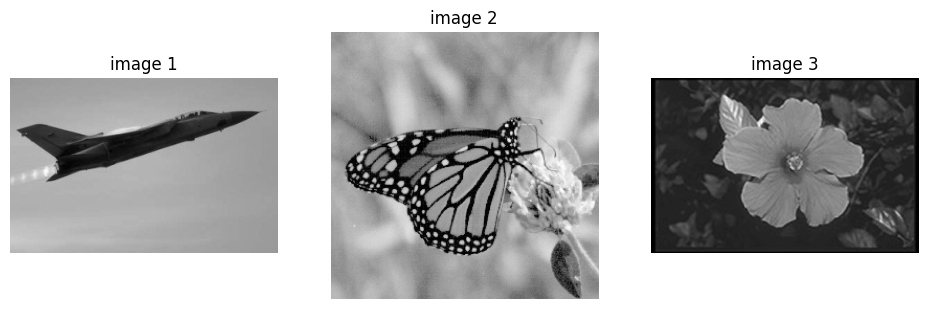

In [6]:
img1 = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of airplane.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of butterfly.bmp', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of flower.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('image 1')
plt.imshow(img1, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title('image 2')
plt.imshow(img2, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title('image 3')
plt.imshow(img3, cmap='gray')
plt.axis("off")

print(np.average(img1))

(-0.5, 319.5, 209.5, -0.5)

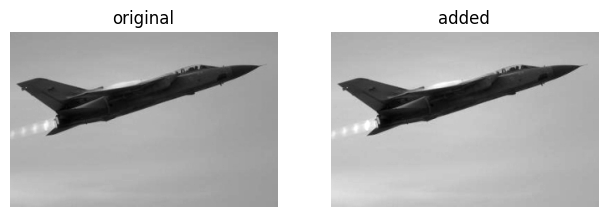

In [53]:
RGB_img = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of airplane.bmp')
Red_img, Green_img, Blue_img = cv2.split(RGB_img) # 채널분리
Gray_img = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of airplane.bmp', cv2.IMREAD_GRAYSCALE)

avg = np.average(img1.flatten()
# 이미지의 평균 값을 활용해 saturation 더하기 연산)
x = avg / 3 
added_img = cv2.add(Gray_img, x);

plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('original')
plt.imshow(Gray_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title('added')
plt.imshow(added_img, cmap='gray')
plt.axis("off")

(-0.5, 319.5, 209.5, -0.5)

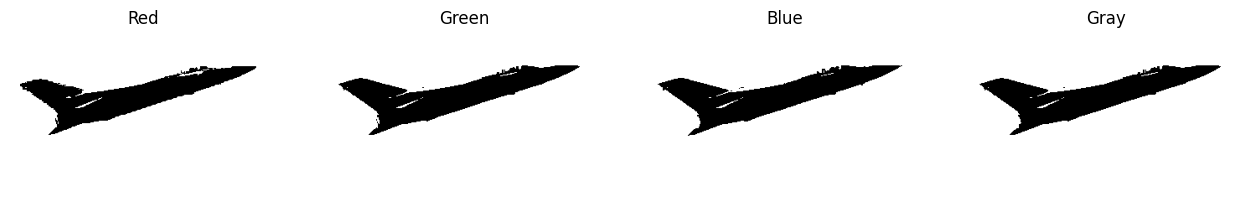

In [61]:
RGB_img = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of airplane.bmp')
Red_img, Green_img, Blue_img = cv2.split(RGB_img) # 채널분리
Gray_img = cv2.imread('/content/drive/MyDrive/차량비전시스템/src/mid/Copy of airplane.bmp', cv2.IMREAD_GRAYSCALE)

avg = np.average(img1.flatten())

# 이미지의 평균 값을 활용해 saturation 더하기 연산
x = avg / 3
Red_img = cv2.add(Red_img, x); 
Green_img = cv2.add(Green_img, x);
Blue_img = cv2.add(Blue_img, x);
added_img = cv2.add(Gray_img, x);

# 평균값을 통해 전역 임계값 적용
R_ret, R_thresh_cv = cv2.threshold(Red_img, avg, 255, cv2.THRESH_BINARY) 
G_ret, G_thresh_cv = cv2.threshold(Green_img, avg, 255, cv2.THRESH_BINARY) 
B_ret, B_thresh_cv = cv2.threshold(Blue_img, avg, 255, cv2.THRESH_BINARY) 
ret, thresh_cv = cv2.threshold(added_img, avg, 255, cv2.THRESH_BINARY) 

plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('Red')
plt.imshow(R_thresh_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title('Green')
plt.imshow(G_thresh_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title('Blue')
plt.imshow(B_thresh_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.title('Gray')
plt.imshow(thresh_cv, cmap='gray')
plt.axis("off")

(-0.5, 319.5, 209.5, -0.5)

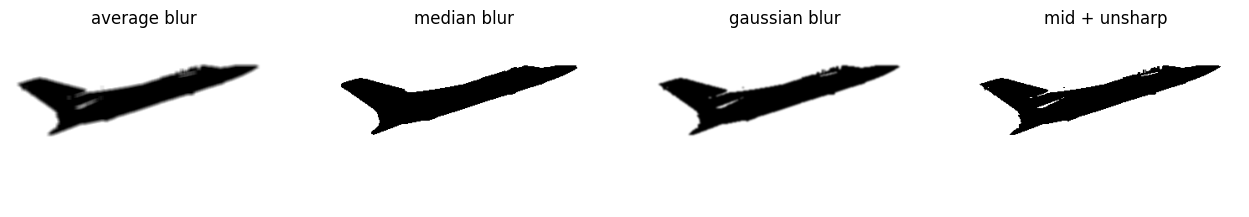

In [62]:
plt.figure(figsize=(20,20))

# 평균 필터링 적용
avg_blur_img = cv2.blur(thresh_cv, (5,5))
plt.subplot(1, 5, 1)
plt.title('average blur')
plt.imshow(avg_blur_img, cmap='gray')
plt.axis("off")

# 중간값 필터링 적용
mid_blur_img = cv2.medianBlur(thresh_cv, 7)
plt.subplot(1, 5, 2)
plt.title('median blur')
plt.imshow(mid_blur_img, cmap='gray')
plt.axis("off")

# 가우시안 필터링 적용
gau_blur_img = cv2.GaussianBlur(thresh_cv, (5,5), 0)
plt.subplot(1, 5, 3)
plt.title('gaussian blur')
plt.imshow(gau_blur_img, cmap='gray')
plt.axis("off")

# 중간값 + 언샤프 적용
edge_img = cv2.addWeighted(thresh_cv, 1.0, mid_blur_img, -1.0, 0)
unsharp_img = cv2.addWeighted(thresh_cv, 1.0, edge_img, 3.0, 0)
plt.subplot(1, 5, 4)
plt.title('mid + unsharp')
plt.imshow(unsharp_img, cmap='gray')
plt.axis("off")

(-0.5, 319.5, 209.5, -0.5)

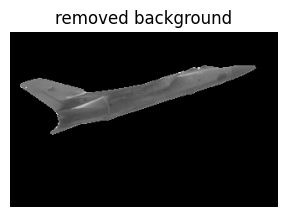

In [63]:
# 픽셀 반전 + 픽셀 AND 연산
reversed_img = cv2.bitwise_not(mid_blur_img)
removed_bg = cv2.bitwise_and(img1, reversed_img);

plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('removed background')
plt.imshow(removed_bg, cmap='gray')
plt.axis("off")

(-0.5, 319.5, 209.5, -0.5)

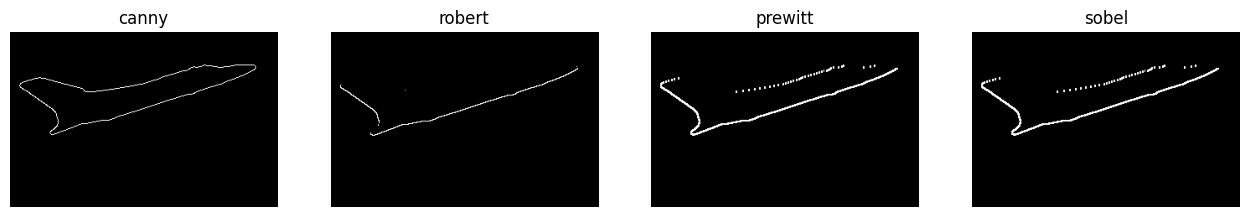

In [64]:
# 에지 검출을 위한 커널 값
roberts_x = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
roberts_y = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]])

prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# 에지 검출
roberts_x = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, roberts_x))
roberts_y = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, roberts_y))

prewitt_x = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, prewitt_y))

sobel_x = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, sobel_x))
sobel_y = cv2.convertScaleAbs(cv2.filter2D(mid_blur_img, -1, sobel_y))

plt.figure(figsize=(20,20))

# canny 에지 검출
canny_img = cv2.Canny(mid_blur_img, 100, 200)
plt.subplot(1, 5, 1)
plt.title('canny')
plt.imshow(canny_img, cmap='gray')
plt.axis("off")

# robert 에지 검출
robert_img = cv2.addWeighted(roberts_x, 1, roberts_y, 1, 0)
plt.subplot(1, 5, 2)
plt.title('robert')
plt.imshow(robert_img, cmap='gray')
plt.axis("off")

# prewitt 에지 검출
prewitt_img = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
plt.subplot(1, 5, 3)
plt.title('prewitt')
plt.imshow(prewitt_img, cmap='gray')
plt.axis("off")

# sobel 에지 검출
sobel_img = cv2.addWeighted(sobel_x, 1, sobel_y, 1, 0)
plt.subplot(1, 5, 4)
plt.title('sobel')
plt.imshow(prewitt_img, cmap='gray')
plt.axis("off")